In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from bioinfokit.visuz import cluster

In [31]:
data = pd.read_csv("mcdonalds.csv")

In [32]:
print(data.head())
print(data.info())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

In [33]:
print(data.describe())

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [34]:
print(data.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [35]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 
                  'greasy', 'fast', 'cheap', 'tasty', 
                  'expensive', 'healthy', 'disgusting']
MD = data[binary_columns].replace({"Yes": 1, "No": 0})

C:\Users\soura\AppData\Local\Temp\ipykernel_14304\1666957606.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD = data[binary_columns].replace({"Yes": 1, "No": 0})


In [36]:
scaler = StandardScaler()
MD_scaled = scaler.fit_transform(MD)

In [37]:
pca = PCA()
MD_pca = pca.fit_transform(MD_scaled)

In [38]:
explained_variance_ratio = pca.explained_variance_ratio_

In [39]:
print("Cumulative explained variance ratio:")
print(np.cumsum(explained_variance_ratio))

Cumulative explained variance ratio:
[0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


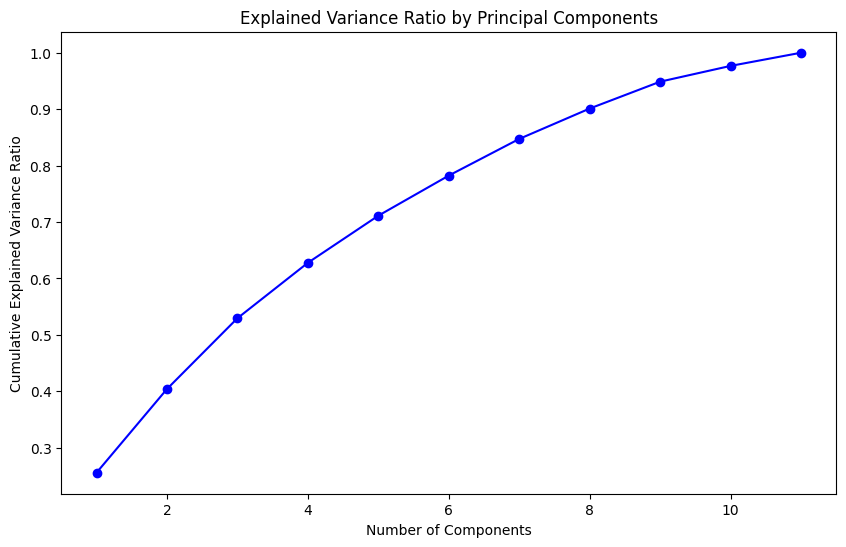

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [41]:
max_clusters = 8
inertias = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(MD_scaled)
    inertias.append(kmeans.inertia_)

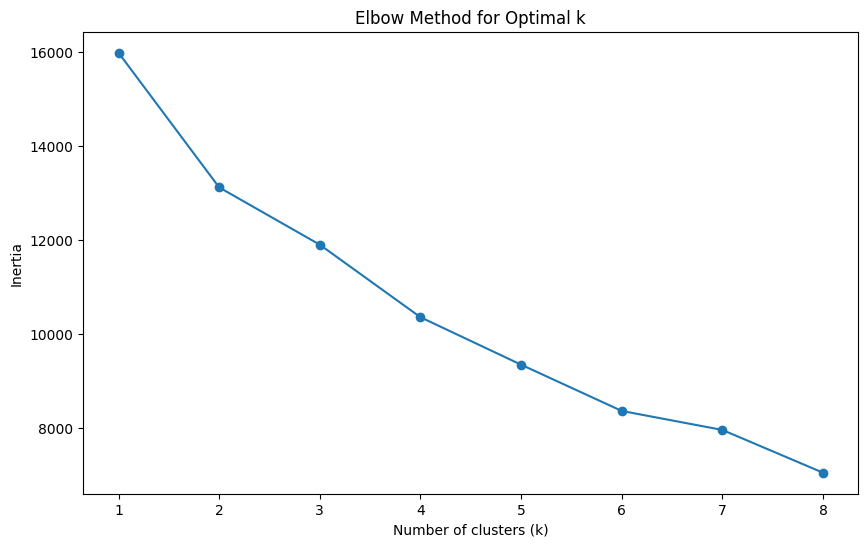

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [43]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = final_kmeans.fit_predict(MD_scaled)

In [44]:
data['Cluster'] = cluster_labels

In [45]:
for col in binary_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

cluster_means = data.groupby('Cluster')[binary_columns].mean()
print("Cluster characteristics:")
print(cluster_means)

Cluster characteristics:
         yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
Cluster                                                                    
0          NaN         NaN    NaN        NaN     NaN   NaN    NaN    NaN   
1          NaN         NaN    NaN        NaN     NaN   NaN    NaN    NaN   
2          NaN         NaN    NaN        NaN     NaN   NaN    NaN    NaN   
3          NaN         NaN    NaN        NaN     NaN   NaN    NaN    NaN   

         expensive  healthy  disgusting  
Cluster                                  
0              NaN      NaN         NaN  
1              NaN      NaN         NaN  
2              NaN      NaN         NaN  
3              NaN      NaN         NaN  


C:\Users\soura\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\soura\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


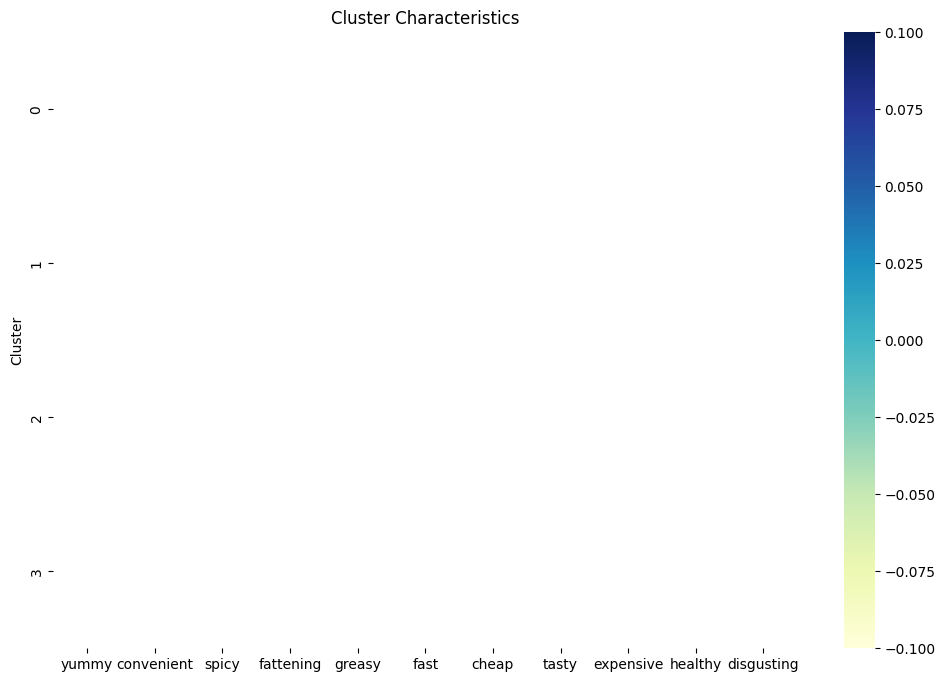

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu')
plt.title('Cluster Characteristics')
plt.show()

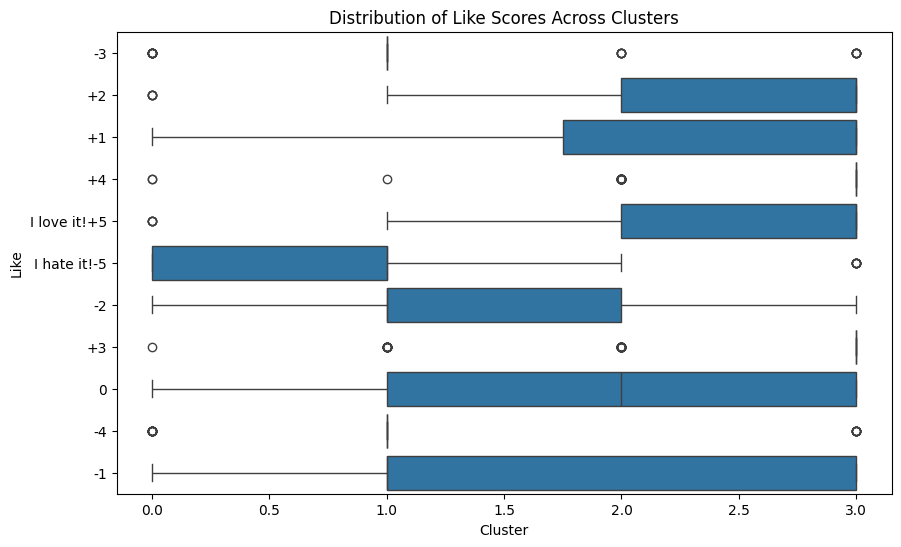

In [47]:
if 'Like' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='Like', data=data)
    plt.title('Distribution of Like Scores Across Clusters')
    plt.show()

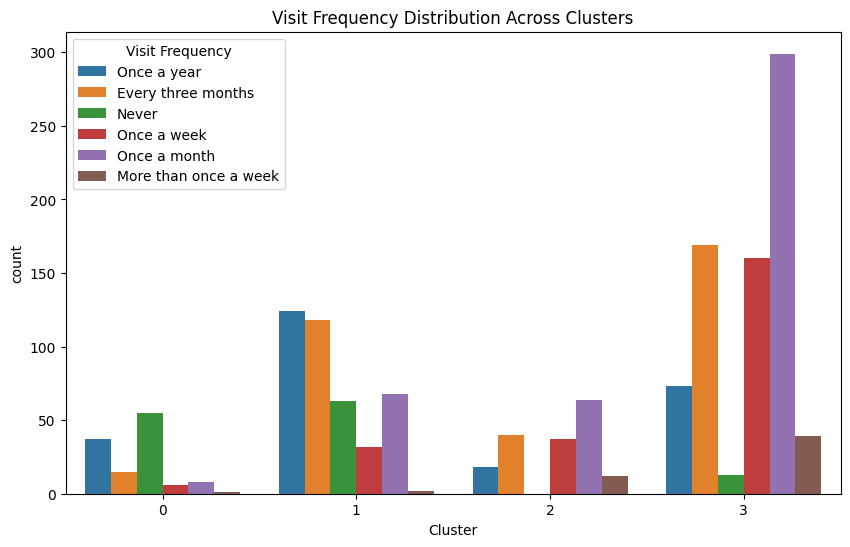

In [48]:
if 'VisitFrequency' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue='VisitFrequency', data=data)
    plt.title('Visit Frequency Distribution Across Clusters')
    plt.legend(title='Visit Frequency')
    plt.show()